In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [35]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
inputs = df.drop('target',axis='columns')
target = wine.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)
len(x_train)

142

In [5]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
m1 = GaussianNB()
m2 = MultinomialNB()

In [6]:
m1.fit(x_train, y_train)
m2.fit(x_train, y_train)

MultinomialNB()

In [7]:
m1.score(x_test,y_test)

0.9722222222222222

In [8]:
m2.score(x_test,y_test)

0.8333333333333334

In [9]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(m1,inputs,target)
cv.mean()

0.9663492063492063

In [10]:
cv = cross_val_score(m2,inputs,target)
cv.mean()

0.843968253968254

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [12]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
cv = cross_val_score(model,inputs,target)
cv.mean()

0.8763492063492062

In [14]:
model.score(x_test,y_test)

0.9444444444444444

In [18]:
df.describe

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  

In [17]:
df1 = df[df.target==0]
df2 = df[df.target==1]
df3 = df[df.target==2]

In [19]:
import matplotlib.pyplot as mlt
%matplotlib inline

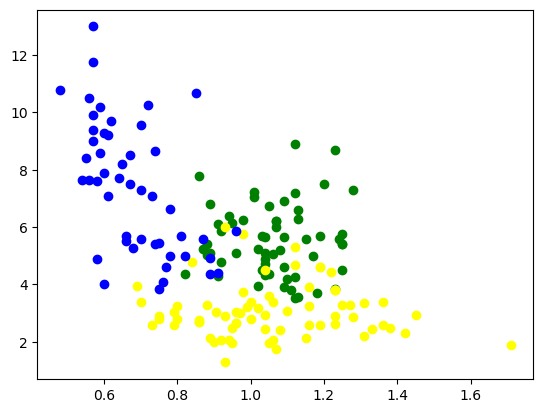

In [43]:
mlt.scatter(df1.hue,df1.color_intensity, color='green')
mlt.scatter(df2.hue,df2.color_intensity, color='yellow')
mlt.scatter(df3.hue,df3.color_intensity, color='blue')

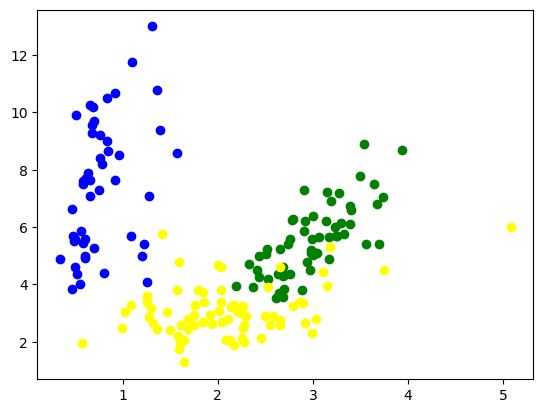

In [44]:
mlt.scatter(df1.flavanoids,df1.color_intensity, color='green')
mlt.scatter(df2.flavanoids,df2.color_intensity, color='yellow')
mlt.scatter(df3.flavanoids,df3.color_intensity, color='blue')